In [42]:
import tensorflow as tf
import random
import pandas as pd
import numpy
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2

Initialisign data set for parabola
Y = a*X^2 + b

In [2]:
X = []
Y = []
for i in range(10):
    a = random.randint(2,100)
    X.append(a)
    Y.append(a**2 + 5)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.iloc[0])
print(Y.iloc[0])

0    57
Name: 0, dtype: int64
0    3254
Name: 0, dtype: int64


In [303]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=1)(inp**2)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'parabola')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mae')

Model: "parabola"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_96 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ power_22 (Power)                │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [304]:
loss = model.fit(X,Y, batch_size=10,validation_data=(X,Y), epochs= 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - loss: 101.6906 - val_loss: 101.1577
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 101.1577 - val_loss: 100.6275
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 100.6275 - val_loss: 100.1000
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 100.1000 - val_loss: 99.5753
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 99.5753 - val_loss: 99.0535
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 99.0535 - val_loss: 98.5345
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 98.5345 - val_loss: 98.0184
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 98.0184 - val_loss: 97.5053
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 97.5053 - val_loss: 96.9952
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 96.9952 - val_loss: 96.4881
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 96.4881 - val_loss: 95.9841
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━

In [307]:
y = model.predict(pd.DataFrame([8]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[69.12425]]


In [92]:
X = []
Y = []
for i in range(5000):
    a = random.uniform(-10.0,10.0)
    X.append(a)
    Y.append(a**3)
X = pd.DataFrame(X,columns=['X'])
Y = pd.DataFrame(Y,columns=['Y'])
print(X.iloc[0])
print(Y.iloc[0])

X   -9.621142
Name: 0, dtype: float64
Y   -890.59416
Name: 0, dtype: float64


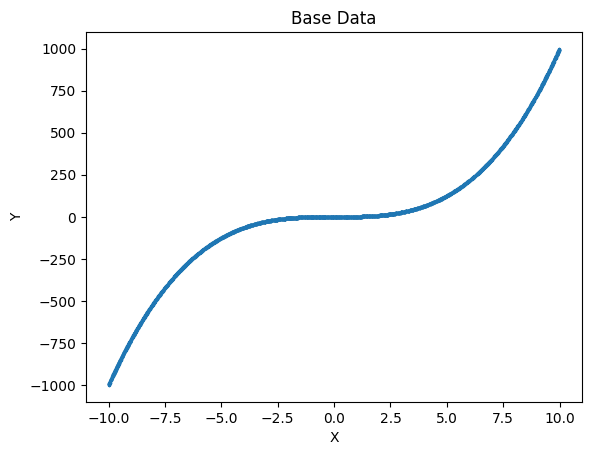

In [95]:
df = pd.concat([X,Y],axis=1)
df.head()
df.plot(kind='scatter',x='X',y='Y', s=2)
plt.title('Base Data')
# plt.show()
plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
img = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
# cv2.imshow('image',img)
height, width, layers = img.shape
# print(df.shape)


In [103]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=6,activation='tanh')(inp)
i = keras.layers.Dense(units=6,activation='tanh')(i)
i = keras.layers.Dense(units=6,activation='tanh')(i)
# i = keras.layers.Dense(units=6,activation='tanh')(i)
# i = keras.layers.Dense(units=6,activation='tanh')(i)
# i = keras.layers.Dense(units=5,activation='relu')(i)
# i = keras.layers.Dense(units=5,activation='relu')(i)
# i = keras.layers.Dense(units=3,activation='relu')(i)
i = keras.layers.Dense(units=1)(i)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'Cube')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mse')

Model: "Cube"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
err = []
time = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/Traning_steps.avi',fourcc,30,(width,height))
er_vid = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/error_steps.avi',fourcc,30,(width,height))
for i in range(360):
    loss = model.fit(X,Y, batch_size=5000,validation_data=(X,Y), epochs= 15)
    print("STEP: ",i)
    y = pd.DataFrame(model.predict(X),columns=['y'])
    df = pd.concat([X,y],axis=1)
    # df.head()
    # os.system('clear')
    err.append(loss.history['loss'][-1])
    time.append(i)
    plt.scatter(time,err,s=1)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    eri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    er_vid.write(eri)
    plt.clf()
    df.plot(kind='scatter',x='X',y='y',s = 1.5)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    tri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    video.write(tri)
    plt.clf()
    # plt.title('Trained')
    # plt.show()
    # print(df.shape)
video.release()
er_vid.release()

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 149268.7656 - val_loss: 149177.4375
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 149177.4375 - val_loss: 149085.1250
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 149085.1250 - val_loss: 148991.2188
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 148991.2344 - val_loss: 148895.9375
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 148895.9375 - val_loss: 148799.6562
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 148799.6719 - val_loss: 148702.8125
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 148702.7969 - val_loss: 148605.7500
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 148605.7500 - val_loss: 148508.8750
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 148508.8750 - val_loss: 148412.4688
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 148412.4688 - val_loss: 148316.7500
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 148316.7500 -

c:\Users\arpit\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 126930.5547 - val_loss: 126837.6797
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 126837.6641 - val_loss: 126744.6250
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 126744.6406 - val_loss: 126651.4688
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 126651.4531 - val_loss: 126558.1250
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 126558.1250 - val_loss: 126464.6875
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 126464.6719 - val_loss: 126371.0703
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 126371.0938 - val_loss: 126277.3594
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 126277.3438 - val_loss: 126183.5000
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 126183.4844 - val_loss: 126089.4688
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 126089.4688 - val_loss: 125995.3281
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 125995.3359 - val_los

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
print(type(loss.history['loss'][-1]))

<class 'float'>


In [105]:
video.release()
er_vid.release()

In [74]:
y = model.predict(pd.DataFrame([10]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[139.77525]]
